# Explore here

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

              name  popularity  duration_min
0   Tieduprightnow          75      4.165933
1      Gamesofluck          72      5.801550
2        Overnight          71      3.660067
3  Yougotmefeeling          69      3.057700
4        Lightenup          70      3.953783


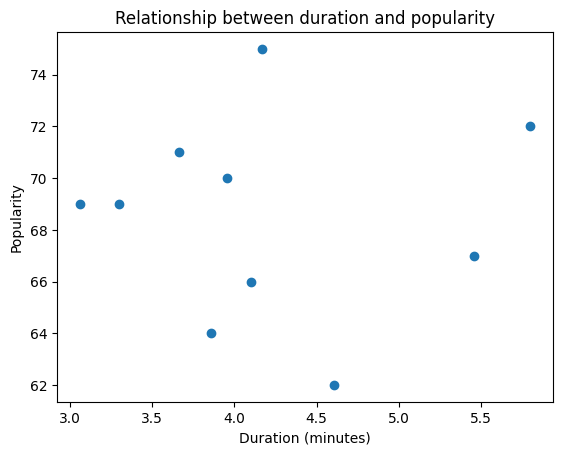

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

artist_id = "3oKRxpszQKUjjaHz388fVA"

results = spotify.artist_top_tracks(artist_id)

songs = []
for track in results['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })


tracks_df = pd.DataFrame(songs)

print(tracks_df.head(5))

plt.scatter(tracks_df['duration_min'], tracks_df['popularity'])
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Relationship between duration and popularity')
plt.show()
